# Assignment 1

### Write Python code to find the quality of your degraded face image compared to your original face image without using the built-in function of PSNR.

To get the degraded image, use the built-in function to:

1. Blur the image.
2. Add Gaussian noise.
3. Compress using JPEG 2000 and then decompress it around 70% - 80%.


In [62]:
import numpy as np
import cv2
from math import sqrt
import matplotlib.pyplot as plt

### Load the original image

In [63]:
original_image = cv2.imread('images/image1.jpg')
# cv2.imshow('Original Image', original_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Blur Image Using Gaussian Filter

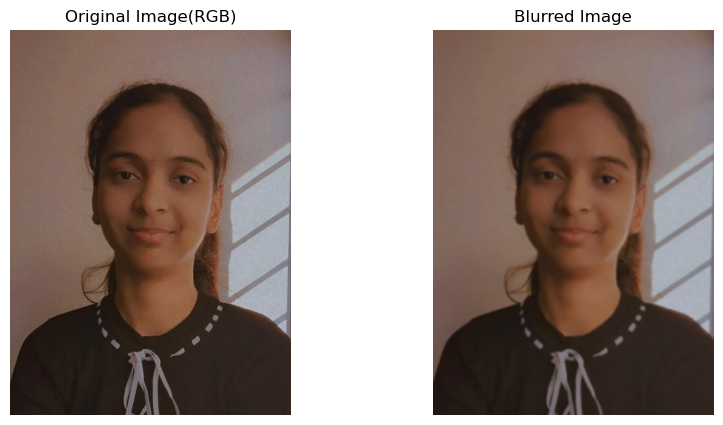

In [64]:
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
blurred_image = cv2.GaussianBlur(image_rgb, (9, 9), 0)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image(RGB)")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.axis('off')

plt.show()


# cv2.imshow('Blurred Image', blurred_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [65]:
mse = np.mean((image_rgb - blurred_image) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7.879284893290107


### Add Gaussian Noise to the blurred Image

#### Function to define Gaussian Noise 

In [66]:
def add_gaussian_noise(image, mean=0, sigma=25, noise_scale=1):
    noisy_image = image.copy()
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')  
    gauss = gauss * noise_scale  # Scale down the noise
    noisy_image = cv2.add(noisy_image.astype('float32'), gauss)  
    noisy_image = np.clip(noisy_image, 0, 255)  
    return noisy_image.astype('uint8')  

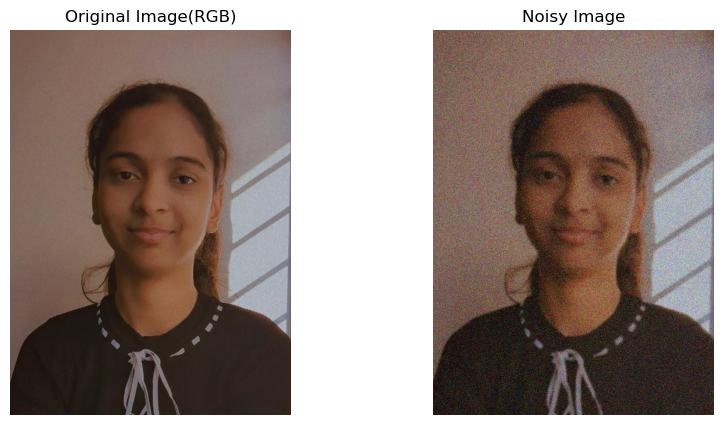

In [67]:
noisy_image = add_gaussian_noise(blurred_image)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image(RGB)")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.axis('off')

plt.show()

# cv2.imshow('Noisy Image', noisy_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [68]:
mse = np.mean((image_rgb - noisy_image) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 93.83549361872524


### Compress and Decompress Image

In [69]:
original_size = noisy_image.nbytes

_, compressed_image_bytes = cv2.imencode(
    '.jp2', noisy_image, 
    [cv2.IMWRITE_JPEG2000_COMPRESSION_X1000, 200]  
)

decompressed_image = cv2.imdecode(compressed_image_bytes, cv2.IMREAD_COLOR)

# Compressed image size (in bytes)
compressed_size = len(compressed_image_bytes)

# Print original and compressed sizes
print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")

___# Calculate and print the compression ratio
compression_ratio = (original_size - compressed_size) / original_size
print(f"Compression Ratio: {compression_ratio:.2f}")

Original Image Size: 1392.55 KB
Compressed Image Size: 278.45 KB
Compression Ratio: 0.80


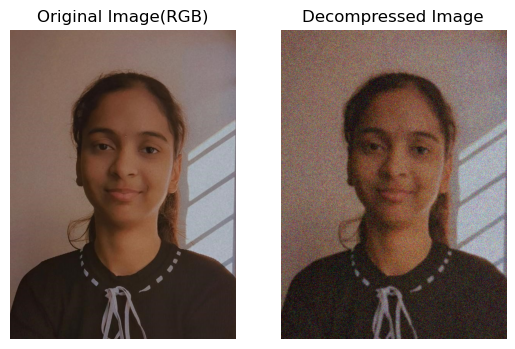

In [70]:
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image(RGB)")
plt.axis('off')



plt.subplot(1, 2, 2)
plt.imshow(decompressed_image)
plt.title("Decompressed Image")
plt.axis('off')

plt.show()

# cv2.imshow('Decompressed Image', decompressed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [71]:
mse = np.mean((image_rgb - decompressed_image) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 91.30468544547603


### Calculating PSNR Values

#### PSNR Function

In [72]:
# Function to compute MSE
def mse(image1, image2):
    return np.mean((image1.astype(np.int32) - image2.astype(np.int32)) ** 2)

# Function to compute PSNR
def psnr(image1, image2):
    mse_value = mse(image1, image2)
    if mse_value == 0:
        return float('inf')  # If MSE is 0, the images are identical
    max_pixel = 255.0
    return 10 * np.log10((max_pixel**2) / (mse_value)) 

In [73]:
psnr_value = psnr(image_rgb, decompressed_image)

# Print the PSNR value
print(f"PSNR between the original and degraded image: {psnr_value:.2f} dB")

PSNR between the original and degraded image: 20.40 dB


#### In-Built PNSR Function

In [74]:
psnr_value = cv2.PSNR(image_rgb, decompressed_image)

# Print the PSNR value
print(f"PSNR between the original and decompressed image: {psnr_value:.2f} dB")

PSNR between the original and decompressed image: 20.40 dB
